In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
cars = pd.read_csv('divar_cars_cat_price.csv', index_col=0)
print(cars.shape)
cars.head()

(103799, 39)


image_count   mileage  price_cat   age  city_Ahvaz  city_Isfahan  \
0            0  290000.0          0  14.0           0             0   
1            3  175000.0          1  23.0           0             0   
2            4   80000.0          2   4.0           0             0   
3            3  125000.0          0  11.0           0             0   
4            2   11000.0          1   2.0           0             0   

   city_Karaj  city_Kermanshah  city_Mashhad  city_Qom  ...  \
0           1                0             0         0  ...   
1           0                0             0         0  ...   
2           0                0             0         0  ...   
3           0                0             0         0  ...   
4           0                0             0         0  ...   

   brand_Pickup truck  brand_Pride  brand_RD/ROA  brand_Renault  brand_Runna  \
0                   0            0             0              0            0   
1                   0            0             0              0            0   
2                   0            0             0              0            0   
3                   0            0             0              0            0   
4                   0            0             0              0            0   

   brand_Samand  brand_Tiba  brand_Tondar 90  brand_Toyota  brand_nan  
0             0           0                0             0          0  
1             0           0                0             0          0  
2             1           0                0             0          0  
3             0           0                0             0          0  
4             0           0                0             0          0  

[5 rows x 39 columns]

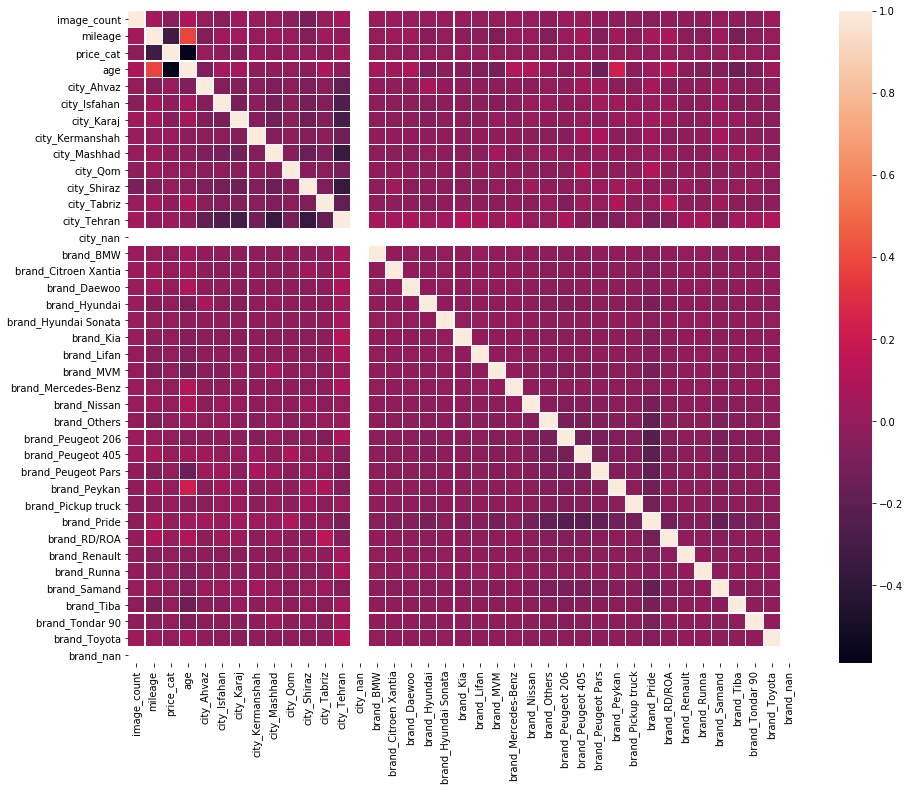

In [3]:
corr = cars.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, ax=ax, linewidths=0.1)

# Train Test Split
split dataset into 4:1

In [10]:
from sklearn.model_selection import train_test_split
X = cars.drop(columns=['price_cat'])
y = cars['price_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Selection
by this workaround accuracy will drop significantly<br>
convert following block from Markdown to Code, for evaluation

from sklearn.feature_selection import SelectPercentile, SelectKBest, chi2
percentile_best = 10
k_best = 5
#X_new = SelectPercentile(chi2, percentile=percentile_best).fit_transform(X, y)
X_new = SelectKBest(chi2, k=k_best).fit_transform(X, y)
print(X_new.shape)

X_test, X_train, y_test, y_train = train_test_split(X_new, y, test_size=0.2)

### Single Brand
by this feature and data reduction, we will focus on a single brand, pride (which is the most used brand)<br>
because of great feature reduction we can user much lower depth for the model (I used depth of 1 and the result was around 83 for both, train and test)

In [5]:
prides = cars.loc[cars['brand_Pride'] == 1][cars.columns.drop(list(cars.filter(regex='brand_')))]

from sklearn.model_selection import train_test_split
X = prides.drop(columns=['price_cat'])
y = prides['price_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Naive Bayes - Gaussian

In [11]:
from sklearn.naive_bayes import GaussianNB
clf_nb_gau = GaussianNB().fit(X_train, y_train)

In [12]:
y_train_pred = clf_nb_gau.predict(X_train)
acc_score = accuracy_score(y_train, y_train_pred)
print('The accuracy of "Gaussian Naive Bayes" model for TRAIN on price (categorized into {} classes) is "{:.2f}%"'.format(len(y_train.unique()), acc_score*100))

The accuracy of "Gaussian Naive Bayes" model for TRAIN on price (categorized into 3 classes) is "59.88%"


In [13]:
y_test_pred = clf_nb_gau.predict(X_test)
acc_score = accuracy_score(y_test, y_test_pred)
print('The accuracy of "Gaussian Naive Bayes" model for TEST on price (categorized into {} classes) is "{:.2f}%"'.format(len(y_test.unique()), acc_score*100))

The accuracy of "Gaussian Naive Bayes" model for TEST on price (categorized into 3 classes) is "60.40%"


In [14]:
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       0.74      0.61      0.67      6807
           2       0.50      0.36      0.42      6806
           3       0.58      0.83      0.68      7147

    accuracy                           0.60     20760
   macro avg       0.61      0.60      0.59     20760
weighted avg       0.61      0.60      0.59     20760



# Naive Bayes - Multinomial

In [66]:
from sklearn.naive_bayes import MultinomialNB
clf_nb_mul = MultinomialNB().fit(X_train, y_train)

In [67]:
y_train_pred = clf_nb_mul.predict(X_train)
acc_score = accuracy_score(y_train, y_train_pred)
print('The accuracy of "Multinomial Naive Bayes" model for TRAIN on price (categorized into {} classes) is "{:.2f}%"'.format(len(y_train.unique()), acc_score*100))

The accuracy of "Multinomial Naive Bayes" model for TRAIN on price (categorized into 3 classes) is "57.58%"


In [68]:
y_test_pred = clf_nb_mul.predict(X_test)
acc_score = accuracy_score(y_test, y_test_pred)
print('The accuracy of "Multinomial Naive Bayes" model for TEST on price (categorized into {} classes) is "{:.2f}%"'.format(len(y_test.unique()), acc_score*100))

The accuracy of "Multinomial Naive Bayes" model for TEST on price (categorized into 3 classes) is "57.20%"


In [69]:
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       0.57      0.55      0.56      2053
           2       0.43      0.53      0.48      1984
           3       0.77      0.63      0.70      2061

    accuracy                           0.57      6098
   macro avg       0.59      0.57      0.58      6098
weighted avg       0.59      0.57      0.58      6098



# Naive Bayes - Complement

In [70]:
from sklearn.naive_bayes import ComplementNB
clf_nb_com = ComplementNB().fit(X_train, y_train)

In [71]:
y_train_pred = clf_nb_com.predict(X_train)
acc_score = accuracy_score(y_train, y_train_pred)
print('The accuracy of "Complement Naive Bayes" model for TRAIN on price (categorized into {} classes) is "{:.2f}%"'.format(len(y_train.unique()), acc_score*100))

The accuracy of "Complement Naive Bayes" model for TRAIN on price (categorized into 3 classes) is "56.54%"


In [72]:
y_test_pred = clf_nb_com.predict(X_test)
acc_score = accuracy_score(y_test, y_test_pred)
print('The accuracy of "Complement Naive Bayes" model for TEST on price (categorized into {} classes) is "{:.2f}%"'.format(len(y_test.unique()), acc_score*100))

The accuracy of "Complement Naive Bayes" model for TEST on price (categorized into 3 classes) is "57.28%"


In [73]:
print(classification_report(y_test, y_test_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       0.56      0.64      0.60      2053
           2       0.44      0.45      0.44      1984
           3       0.74      0.63      0.68      2061

    accuracy                           0.57      6098
   macro avg       0.58      0.57      0.57      6098
weighted avg       0.58      0.57      0.58      6098

